In [35]:
from selenium import webdriver
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys   

Login into Instagram

In [7]:
driver=webdriver.Chrome(executable_path='/Users/atharvjairath/Downloads/chromedriver') #opening webdriver

/Users/atharvjairath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


In [4]:
def loginInsta(user,pwd):
    driver.get("https://www.instagram.com/accounts/login/")
    driver.implicitly_wait(5)
    username = driver.find_element_by_name('username')
    username.send_keys(user)
    password = driver.find_element_by_name('password')
    password.send_keys(pwd)
    password.submit()
    time.sleep(2)
    notnow = driver.find_element_by_css_selector('body > div.RnEpo.Yx5HN > div > div > div.mt3GC > button.aOOlW.HoLwm') #to cancel the popup on login
    notnow.click() 

In [8]:
loginInsta("bot_by_atharv","atharv123euro") #function to login in insta which sends Username and password as argument

From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [14]:
foodhandels_usernames=['dilsefoodie', 'foodtalkindia', 'yourfoodlab', 'foodnetwork', 'foodgod', 'foodandwine', 'food_factors', 'buzzfeedfood', 'foodys',
 'diyfoodys', 'foodeducationfund', 'majorfoodgroup', 'foodwithmichel', 'foodinsider', 'mumbaifoodie', 'foodiemagician', 'trimeats', 'foodfightabc',
 'lafoodfest', 'nyfoodsharings', 'fitfoodjkt', 'hazelzakariya', 'wholefoods', 'snacksaftersundown', 'somastreatfoodpark', 'foodbutler',
 'foodnetworkkitchen', 'foodwellmcr', 'love_food', 'besar_food', 'foodstirs', 'jewishfood', 'thefoodbabe', 'foodjuiceandmore', 'foodtipz',
 'shugarysweets', 'clerkenwellboyec1', 'foodieliciousfood', 'foodiefoodlover', 'fastfood_insider', 'impossible_foods', 'questlovesfood',
 'foodbabyny', 'tidymom', 'albaik', 'cchannel_food_id', 'dailyfoodfeed', 'food52', 'worldfoodprogramme', 'lottie_tots_loves_food']

## foodhandels from pervious project

In [15]:
foodhandels_usernames=foodhandels_usernames[0:10]
foodhandels_usernames

['dilsefoodie',
 'foodtalkindia',
 'yourfoodlab',
 'foodnetwork',
 'foodgod',
 'foodandwine',
 'food_factors',
 'buzzfeedfood',
 'foodys',
 'diyfoodys']

In [16]:
top_followers={}

In [10]:
def OpenPage(name):
    driver.get("https://www.instagram.com/")
    search_text=driver.find_element_by_css_selector('#react-root > section > nav > div._8MQSO.Cx7Bp > div > div > div.LWmhU._0aCwM > input')
    search_text.send_keys(name)
    time.sleep(2)
    btn=driver.find_element_by_class_name("Ap253").click()

In [17]:
def top_10_foodhandles(foodhandels_usernames):
    for username in foodhandels_usernames:
        OpenPage(username)
        time.sleep(8)
        Followers=driver.find_elements_by_class_name("g47SY ")[1]
        followers_number=Followers.get_attribute("title")
        followers_number=followers_number.replace(",","")
        followers_number=int(float(followers_number))
        top_followers[username]=followers_number
        

In [18]:
top_10_foodhandles(foodhandels_usernames)

In [19]:
top_followers

{'dilsefoodie': 388309,
 'foodtalkindia': 294036,
 'yourfoodlab': 1015736,
 'foodnetwork': 10281800,
 'foodgod': 3596765,
 'foodandwine': 3352632,
 'food_factors': 1117,
 'buzzfeedfood': 3763302,
 'foodys': 9552885,
 'diyfoodys': 4151281}

1.1 find the top 5 which have the highest number of followers

In [75]:
import operator
sorted_d = dict( sorted(top_followers.items(), key=operator.itemgetter(1),reverse=True))
count=1
for i in sorted_d.keys():
    if count>5:
            break
    if i == '':
        continue
    else:
        print(i,sorted_d[i])
    count+=1 

foodnetwork 10281800
foodys 9552885
diyfoodys 4151281
buzzfeedfood 3763302
foodgod 3596765


1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [59]:
def Num_post(username):
    OpenPage(username)
    time.sleep(2)
    count=0
    post = driver.find_element_by_class_name("_9AhH0").click()
    num=timeChecker()
    if num==0:
        return count
    count+=num
    next_btn=driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a").click()
    while num:
        next_btn=driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a[2]").click()
        time.sleep(1)
        num=timeChecker()
        if num ==-1:
            break
        count+=num
    return count
        
        
    
    

In [60]:
def timeChecker():
    days_ago=driver.find_element_by_css_selector("body > div._2dDPU.CkGkG > div.zZYga > div > article > div.eo2As > div.k_Q0X.NnvRN > a > time")
    if days_ago.text[3]=="M":
        return 1
    elif days_ago.text[3]=="H":
        return 1
    elif (days_ago.text[0]=="1") or (days_ago.text[0]=="2") or  (days_ago.text[0]=="3"):
        return 1
    else:
        return 0
    

In [71]:
top_5=["foodnetwork","foodys", "diyfoodys","buzzfeedfood","foodgod"]
number_of_post={}
for i in top_5:
    count_of_post=Num_post(i)
    number_of_post[i]=count_of_post

In [72]:
number_of_post


{'foodnetwork': 41,
 'foodys': 8,
 'diyfoodys': 1,
 'buzzfeedfood': 0,
 'foodgod': 1}

In [81]:
user_names= [ k for k in sorted_d ]
followers= [ v for v in sorted_d.values() ][0:4]
posts= [ v for v in number_of_post.values() ]

In [76]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Userames and Number of followers where Bubbles Width shows No. of posts')

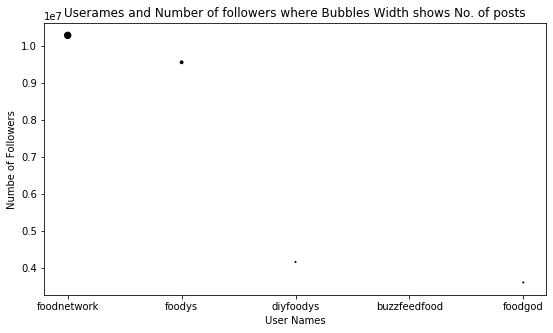

In [89]:
plt.subplots(figsize=(9,5))  
plt.scatter(top_5,followers,s=posts,color="black")
plt.xlabel('User Names')
plt.ylabel('Numbe of Followers')
#plt.xticks(rotation=90)
plt.title('Userames and Number of followers where Bubbles Width shows No. of posts')

2. Your friend also needs a list of hashtags that he should use in his posts.

2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [95]:
hastags_dict={}

In [101]:

def Popular_hastags(username):
    OpenPage(username)
    time.sleep(2)
    post = driver.find_element_by_class_name("_9AhH0").click()
    hastags=driver.find_elements_by_class_name("xil3i")
    for i in hastags:
        hastags_dict[i.text] = hastags_dict.get(i.text,0) + 1
    next_btn=driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a").click()
    for i in range(4):
        next_btn=driver.find_element_by_xpath("/html/body/div[4]/div[1]/div/div/a[2]").click()
        time.sleep(2)
        hastags=driver.find_elements_by_class_name("xil3i")
        for i in hastags:
            hastags_dict[i.text] = hastags_dict.get(i.text,0) + 1
        
    
    

In [104]:
top_5=["foodnetwork","foodys", "diyfoodys","buzzfeedfood","foodgod"]
for i in top_5:
    Popular_hastags(i)
    time.sleep(2)
    

2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [105]:
hastags_dict

{'#DDD': 6,
 '#WeCook': 6,
 '#VeganInspirations': 3,
 '#FoodNetworkKitchen': 3,
 '#SymonDinners': 3,
 '#GiadaEntertains': 3,
 '#foodysoriginal': 2,
 '#boyfriend': 2,
 '#music': 4,
 '#food': 14,
 '#foodpics': 10,
 '#foodinstagram': 10,
 '#foodporn': 10,
 '#foodgasm': 10,
 '#foods': 10,
 '#foodie': 10,
 '#foodforthought': 10,
 '#foodblog': 10,
 '#foodlovers': 10,
 '#foodisfuel': 10,
 '#comida': 10,
 '#chocolate': 16,
 '#doce': 10,
 '#sweet': 10,
 '#delicious': 14,
 '#yummy': 20,
 '#delicia': 10,
 '#happy': 10,
 '#best': 10,
 '#cook': 4,
 '#loveit': 10,
 '#newyear': 4,
 '#thanksgiving': 4,
 '#cheflife': 4,
 '#hairstyles': 10,
 '#hair': 10,
 '#healthyfood': 10,
 '#foodphotography': 10,
 '#follow': 6,
 '#love': 6,
 '#halloweenfood': 6,
 '#halloweenmakeup': 6,
 '#halloweencostume': 6,
 '#BuzzFeast': 10,
 '#damnyum': 2,
 '#طبخات_من_جميع_أنحاء_العالم': 4,
 '#artist': 2,
 '#networking': 2,
 '#vacation': 2,
 '#marketing': 2,
 '#promo': 2,
 '#booking': 2,
 '#referals': 2,
 '#club': 2,
 '#hosting'

Create a csv file with two columns : the word and its frequency

In [106]:
import pandas as pd

In [127]:
data=pd.DataFrame(hastags_dict.items(), columns=["Hastags","Frequency"]) 
#data.sort_values('Frequency',ascending=False)
data.to_csv(index=False)

'Hastags,Frequency\n#DDD,6\n#WeCook,6\n#VeganInspirations,3\n#FoodNetworkKitchen,3\n#SymonDinners,3\n#GiadaEntertains,3\n#foodysoriginal,2\n#boyfriend,2\n#music,4\n#food,14\n#foodpics,10\n#foodinstagram,10\n#foodporn,10\n#foodgasm,10\n#foods,10\n#foodie,10\n#foodforthought,10\n#foodblog,10\n#foodlovers,10\n#foodisfuel,10\n#comida,10\n#chocolate,16\n#doce,10\n#sweet,10\n#delicious,14\n#yummy,20\n#delicia,10\n#happy,10\n#best,10\n#cook,4\n#loveit,10\n#newyear,4\n#thanksgiving,4\n#cheflife,4\n#hairstyles,10\n#hair,10\n#healthyfood,10\n#foodphotography,10\n#follow,6\n#love,6\n#halloweenfood,6\n#halloweenmakeup,6\n#halloweencostume,6\n#BuzzFeast,10\n#damnyum,2\n#طبخات_من_جميع_أنحاء_العالم,4\n#artist,2\n#networking,2\n#vacation,2\n#marketing,2\n#promo,2\n#booking,2\n#referals,2\n#club,2\n#hosting,2\n#platinumcelebrity,2\n#ocalaqueen352,2\n#bringme,2\n#portlandtravel,2\n#sushirestuarant,2\n#sushi,2\n#oregontravel,2\n#sustainability,2\n#foodgod,6\n#whippedcoffee,2\n#stayhome,4\n#socialdistanci

2.4 Now, find the hashtags that were most popular among these bloggers

In [132]:
hastags_dict_popular = dict( sorted(hastags_dict.items(), key=operator.itemgetter(1),reverse=True))
for i in hastags_dict_popular:
    if hastags_dict_popular[i]>=10:
        print(i,hastags_dict_popular[i])   

#yummy 20
#chocolate 16
#food 14
#delicious 14
#foodpics 10
#foodinstagram 10
#foodporn 10
#foodgasm 10
#foods 10
#foodie 10
#foodforthought 10
#foodblog 10
#foodlovers 10
#foodisfuel 10
#comida 10
#doce 10
#sweet 10
#delicia 10
#happy 10
#best 10
#loveit 10
#hairstyles 10
#hair 10
#healthyfood 10
#foodphotography 10
#BuzzFeast 10


2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

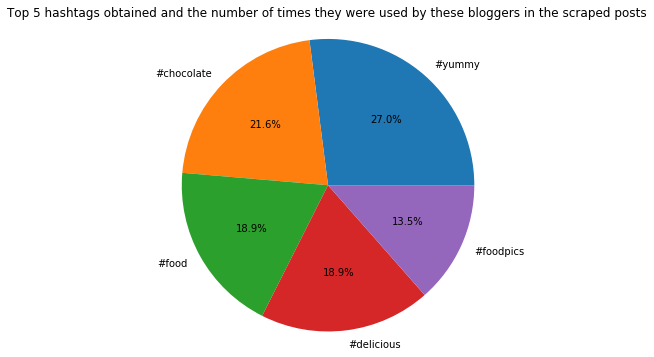

In [134]:
   
hastag_name= [ k for k in hastags_dict_popular ][0:5]
counts= [ v for v in hastags_dict_popular.values() ][0:5]
plt.subplots(figsize=(10,6))
plt.pie(counts,labels=hastag_name,autopct='%1.1f%%')
plt.title("Top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts")
plt.axis("equal")
plt.show()

3.You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:

3.1  Find out the likes of the top 10 posts of the 5 handles obtained earlier.
3.2  Calculate the average likes for a handle.

In [55]:

from selenium.common.exceptions import NoSuchElementException                    #to check for exception
top_5=["foodnetwork","foodys", "diyfoodys","buzzfeedfood","foodgod"]  
                           
top_5_post_like={}                                                          #dictionary for top five post
for t in top_5:                                                        
    post_likes={}
    count=0
    OpenPage(t)
    for i in range(12):
        driver.execute_script('window.scrollBy(0,2000);')                  #scroll by 2000
        time.sleep(1)
    data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]') #fetch the elements
    for j in range(12): 
        driver.execute_script('window.scrollBy(0,-2000);')                 #scroll by 2000
        time.sleep(1)
    driver.execute_script('window.scrollBy(0,500);')                       #make in proper place f post
    final=data
    driver.implicitly_wait(10)
    for p in range(len(final)):
        if count>9:
            break  
        try:
            data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')  #fetch post
            driver.execute_script('window.scrollBy(0,80);')
            final=len(data)
            driver.implicitly_wait(10)
            data[p].click()
            driver.implicitly_wait(10)
            data=driver.find_element_by_xpath('//button[contains(@class,"sqdOP ")]//span')  #find likes on post
            val=data.text
            if val=='':
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')     #close post
                new.click()
                continue
            if val[0]=='V':
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                continue
            val=val.replace(',','')
            ans=val
            count=count+1
            number='post'+str(count)
            post_likes[number]=ans
            new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
            new.click()
            
        except NoSuchElementException:
            new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
            new.click()
    
    top_5_post_like[t]=post_likes
print(top_5_post_likes)

ElementClickInterceptedException: Message: element click intercepted: Element <div class="_9AhH0"></div> is not clickable at point (149, 183). Other element would receive the click: <ul class="Ln-UN">...</ul>
  (Session info: chrome=81.0.4044.113)
Stacktrace:
0   chromedriver                        0x0000000107d1e329 chromedriver + 3838761
1   chromedriver                        0x0000000107cb8123 chromedriver + 3420451
2   chromedriver                        0x0000000107a2c62f chromedriver + 751151
3   chromedriver                        0x000000010799ef8c chromedriver + 171916
4   chromedriver                        0x000000010799d9a8 chromedriver + 166312
5   chromedriver                        0x000000010799bc43 chromedriver + 158787
6   chromedriver                        0x000000010799ae9e chromedriver + 155294
7   chromedriver                        0x0000000107992656 chromedriver + 120406
8   chromedriver                        0x00000001079b6592 chromedriver + 267666
9   chromedriver                        0x00000001079923c6 chromedriver + 119750
10  chromedriver                        0x00000001079b680e chromedriver + 268302
11  chromedriver                        0x00000001079c338b chromedriver + 320395
12  chromedriver                        0x00000001079b67b3 chromedriver + 268211
13  chromedriver                        0x00000001079900bd chromedriver + 110781
14  chromedriver                        0x0000000107991055 chromedriver + 114773
15  chromedriver                        0x0000000107cdfebf chromedriver + 3583679
16  chromedriver                        0x0000000107cece4a chromedriver + 3636810
17  chromedriver                        0x0000000107cecbe7 chromedriver + 3636199
18  chromedriver                        0x0000000107cc3839 chromedriver + 3467321
19  chromedriver                        0x0000000107ced707 chromedriver + 3639047
20  chromedriver                        0x0000000107cd5cc7 chromedriver + 3542215
21  chromedriver                        0x0000000107d03324 chromedriver + 3728164
22  chromedriver                        0x0000000107d24387 chromedriver + 3863431
23  libsystem_pthread.dylib             0x00007fff6eb32109 _pthread_start + 148
24  libsystem_pthread.dylib             0x00007fff6eb2db8b thread_start + 15
